# DAY 3  Practice Assignments: 
    1.Build a deep learning model to classify the mnist digits dataset with Batch Normalization.
    2.Build a Feed Forward Neural Network for any problems with keras tuner.
    
    Use all types of optimizers and observe the performance.

# 1.Build a deep learning model to classify the mnist digits dataset with Batch Normalization.

# Load and preprocess the MNIST dataset

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data
x_train = x_train.reshape((-1, 28 * 28)).astype('float32')
x_test = x_test.reshape((-1, 28 * 28)).astype('float32')

# Define the model-building function with Batch Normalization

In [28]:
from tensorflow.keras import layers, models

# Define the model-building function with Batch Normalization
def build_model(optimizer):
    model = models.Sequential()
    model.add(layers.Dense(64, input_dim=784, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with the specified optimizer
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [27]:
#List of optimizers to try
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

# List of optimizers to try
optimizers = [SGD(), Adam(), Adagrad(), RMSprop()]

In [25]:
#Learning rate schedule
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
# Use LearningRateScheduler and EarlyStopping callbacks
callbacks = [
    LearningRateScheduler(lr_schedule),
    EarlyStopping(monitor='val_loss', patience=3)
]


In [29]:
# Iterate over optimizers and train models
for optimizer in optimizers:
    # Build the model
    model = build_model(optimizer)
    
    # Train the model with history to capture metrics
    history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=callbacks, verbose=2)
    
    # Evaluate on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"\nOptimizer: {optimizer.get_config()['name']}")
    print(f"Test Accuracy: {test_acc}")
    print("-------------------------------")


Epoch 1/20
422/422 - 3s - loss: 0.6703 - accuracy: 0.8068 - val_loss: 0.3628 - val_accuracy: 0.9070 - lr: 0.0100 - 3s/epoch - 7ms/step
Epoch 2/20
422/422 - 1s - loss: 0.3630 - accuracy: 0.9010 - val_loss: 0.2687 - val_accuracy: 0.9263 - lr: 0.0100 - 1s/epoch - 3ms/step
Epoch 3/20
422/422 - 1s - loss: 0.3003 - accuracy: 0.9176 - val_loss: 0.2299 - val_accuracy: 0.9373 - lr: 0.0100 - 1s/epoch - 3ms/step
Epoch 4/20
422/422 - 1s - loss: 0.2619 - accuracy: 0.9291 - val_loss: 0.2053 - val_accuracy: 0.9485 - lr: 0.0100 - 1s/epoch - 3ms/step
Epoch 5/20
422/422 - 1s - loss: 0.2353 - accuracy: 0.9357 - val_loss: 0.1857 - val_accuracy: 0.9517 - lr: 0.0100 - 1s/epoch - 3ms/step
Epoch 6/20
422/422 - 1s - loss: 0.2165 - accuracy: 0.9413 - val_loss: 0.1724 - val_accuracy: 0.9555 - lr: 0.0090 - 1s/epoch - 3ms/step
Epoch 7/20
422/422 - 1s - loss: 0.2018 - accuracy: 0.9454 - val_loss: 0.1631 - val_accuracy: 0.9568 - lr: 0.0082 - 1s/epoch - 3ms/step
Epoch 8/20
422/422 - 1s - loss: 0.1915 - accuracy: 0.94

422/422 - 1s - loss: 0.0533 - accuracy: 0.9845 - val_loss: 0.0854 - val_accuracy: 0.9778 - lr: 9.0484e-04 - 1s/epoch - 3ms/step
Epoch 7/20
422/422 - 1s - loss: 0.0468 - accuracy: 0.9863 - val_loss: 0.0832 - val_accuracy: 0.9772 - lr: 8.1873e-04 - 1s/epoch - 3ms/step
Epoch 8/20
422/422 - 1s - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0793 - val_accuracy: 0.9767 - lr: 7.4082e-04 - 1s/epoch - 3ms/step
Epoch 9/20
422/422 - 1s - loss: 0.0329 - accuracy: 0.9908 - val_loss: 0.0801 - val_accuracy: 0.9782 - lr: 6.7032e-04 - 1s/epoch - 3ms/step
Epoch 10/20
422/422 - 1s - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.0807 - val_accuracy: 0.9787 - lr: 6.0653e-04 - 1s/epoch - 3ms/step
Epoch 11/20
422/422 - 1s - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.0800 - val_accuracy: 0.9800 - lr: 5.4881e-04 - 1s/epoch - 3ms/step
313/313 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9751

Optimizer: RMSprop
Test Accuracy: 0.9750999808311462
-------------------------------


# Plotting training history

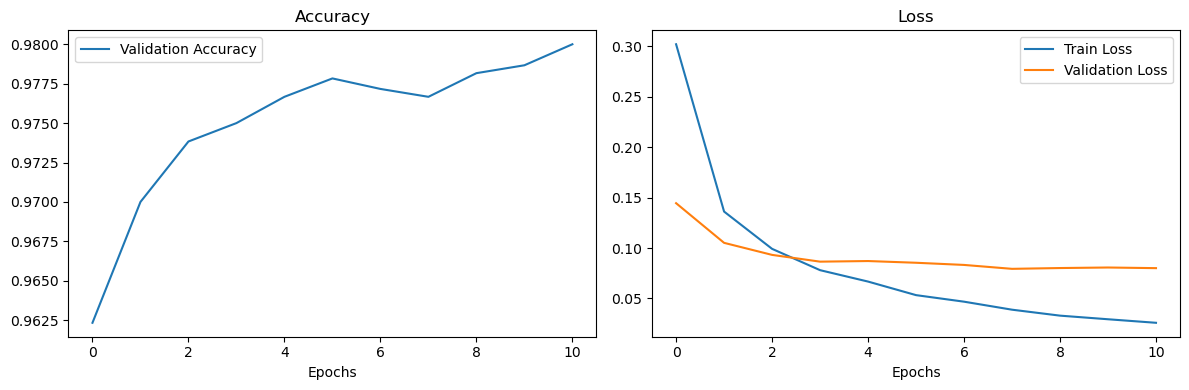

In [30]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()


# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()


313/313 [==============================] - 1s 2ms/step


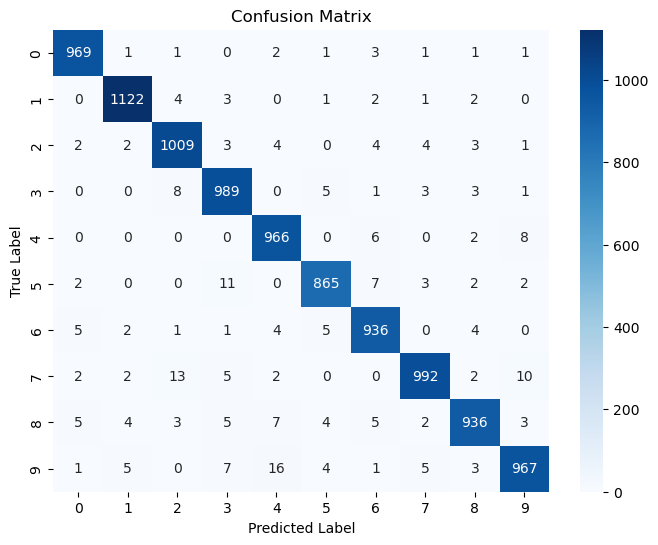

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# 2.Build a Feed Forward Neural Network for any problems with keras tuner.

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset for binary classification
data, labels = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build the Feed Forward Neural Network
model = keras.Sequential([
    layers.Input(shape=(data.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/10
20/20 [==============================] - 1s 11ms/step - loss: 0.6565 - accuracy: 0.6234 - val_loss: 0.5969 - val_accuracy: 0.7000
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5486 - accuracy: 0.7594 - val_loss: 0.5002 - val_accuracy: 0.8438
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.8219 - val_loss: 0.4325 - val_accuracy: 0.8938
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8547 - val_loss: 0.3843 - val_accuracy: 0.9187
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.8656 - val_loss: 0.3499 - val_accuracy: 0.9250
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3645 - accuracy: 0.8750 - val_loss: 0.3228 - val_accuracy: 0.9187
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3452 - accuracy: 0.8766 - val_loss: 0.3053 - val_accuracy: 0.9125
Epoch 8/10
20/20 [=

# Using Keras Tuner to Optimize Hyperparameters

In [35]:

import keras_tuner as kt


# Generate a synthetic dataset for binary classification
data, labels = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(data.shape[1],)))  # Input layer
    model.add(layers.Dense(units=hp.Int('units', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create the tuner
tuner = kt.BayesianOptimization(build_model,
                                 objective='val_accuracy',
                                 max_trials=5,
                                 num_initial_points=2,
                                 directory='keras_tuner_dir',  # Change to your preferred directory
                                 project_name='feed_forward_nn')

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

Reloading Tuner from keras_tuner_dir\feed_forward_nn\tuner0.json
Best Hyperparameters:
{'units': 32, 'learning_rate': 0.004535645054774529}
7/7 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.8500
Test Accuracy: 0.8500000238418579


# Plotting

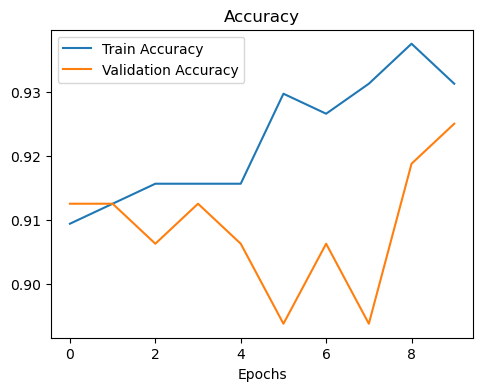

In [36]:
#Plot training history
history = best_model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()


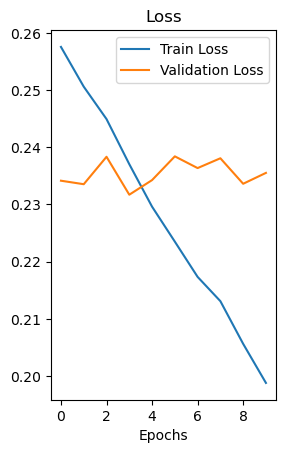

In [37]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

7/7 [==============================] - 0s 3ms/step


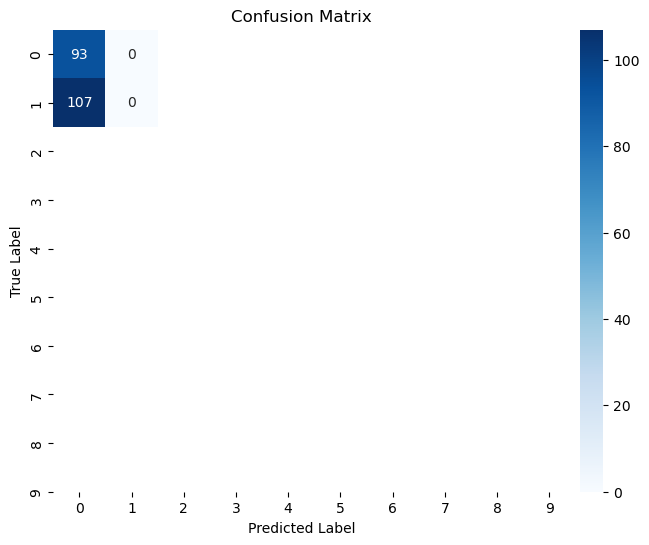

''

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
""